Psych Forum , CHILD AND GROOMED COMMENT STORIES , CHILD ABUSE HASHTAGS

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report 
!pip install textblob
import textblob
from textblob import TextBlob


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esalmna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esalmna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
!pip install plotly
import plotly.graph_objs as go
import plotly
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode()

forum=pd.read_csv('output-onlinecsvtools.csv',encoding= 'iso-8859-1')

data = open('','r', encoding= 'iso-8859-1')


In [68]:
forum=pd.read_csv('psychoforum_scrape.tsv',delimiter='\t')

In [53]:
forum.head()

topics  \
0          What To Do If Your Child Gets Bullied   
1                                     Thank you!   
2             Online studies related to Bullying   
3       Information thread: Definitions of abuse   
4  HELP! I NEVER THOUGHT I WOULD EVER POST HERE!   

                                               links  \
0  https://www.psychforums.com:443/bullying/topic...   
1  https://www.psychforums.com:443/bullying/topic...   
2  https://www.psychforums.com:443/bullying/topic...   
3  https://www.psychforums.com:443/bullying/topic...   
4  https://www.psychforums.com:443/bullying/topic...   

                                             content  
0  I've come across this article by Michelle Borb...  
1  Hi! In this thread, you can take a little time...  
2  Current Surveys / Studies / Call for participa...  
3  This thread is purely for information purposes...  
4  Help...This is a crisis...as a matter of fact ...

In [8]:
forum.columns

Index(['topics', 'links', 'content'], dtype='object')

In [9]:
forum.info

<bound method DataFrame.info of                                             topics  \
0            What To Do If Your Child Gets Bullied   
1                                       Thank you!   
2               Online studies related to Bullying   
3         Information thread: Definitions of abuse   
4    HELP! I NEVER THOUGHT I WOULD EVER POST HERE!   
..                                             ...   
669                    Bullying and Sexual Assualt   
670                                       Bullying   
671                                    New Website   
672                                      old rules   
673                             What would you do?   

                                                 links  \
0    https://www.psychforums.com:443/bullying/topic...   
1    https://www.psychforums.com:443/bullying/topic...   
2    https://www.psychforums.com:443/bullying/topic...   
3    https://www.psychforums.com:443/bullying/topic...   
4    https://www.psychforums.

In [69]:
#checking nullvalues
print(forum.isnull().sum()) 

topics     0
links      0
content    0
dtype: int64


In [70]:
#creating new datafram on Content filed
content_df = forum['content']
content_df = content_df.to_frame()


In [56]:
content_df.head()

content
0  I've come across this article by Michelle Borb...
1  Hi! In this thread, you can take a little time...
2  Current Surveys / Studies / Call for participa...
3  This thread is purely for information purposes...
4  Help...This is a crisis...as a matter of fact ...

In [57]:
content_df.sample(n=10, random_state = 5)

content
248  So that's that?There's no actual help? No prev...
104  Hello!I'm new at the forum. I was feeling very...
612  So wonderful not to understand anything at all...
132  What are you in for?  Gang stalking to force o...
331  I moved into a flat next to university. I move...
494  We are looking for new mods for the Abuse foru...
480  I've been bullied before. I was picked on in 8...
597  I was harrassed for years in school, there was...
99   Do you have an experience with a bully who is ...
293  I'm not sure whether this belongs here or not ...

In [58]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  674 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


In [15]:
content_df.describe()

content
count          674
unique         671
top     *mod edit*
freq             3

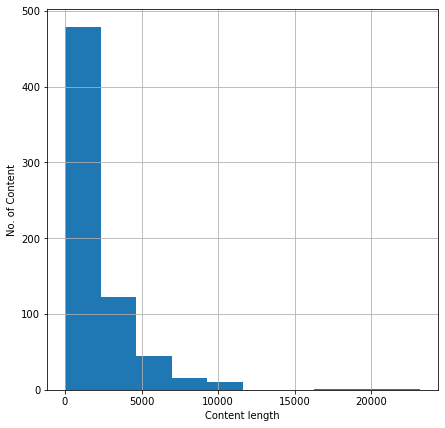

In [71]:
#Plot to check content length and count
plt.figure(figsize=(7,7))
plt.xlabel("Content length")
plt.ylabel("No. of Content")

content_df['content'].str.len().hist()

In [60]:
print(content_df['content'][0])

I've come across this article by Michelle Borba and thought that it could be eventually helpful to parent's of bullied children... being a a victim of this myself I wish my parents knew more about it.1. Listen and gather facts. The first step is often the hardest for parents: listen to your child’s whole story without interrupting. Your goal is to try to figure out what happened, who was involved, where and when the teasing took place, and why your child was teased. Unfortunately, teasing is a part of growing up, but some kids seem to get more than their fair share of insults. If your child appears to be in no immediate danger, keep listening to find out how she reacts to the bullying. By knowing what reaction didn’t stop the bully, you can offer your child a more effective option.2. Teach a bully-proofing strategy. What may work with one child may not with another, so it’s best to discuss a range of options and then choose the one or two your child feels most comfortable with. Here ar

In [21]:
print(type(content_df['content'][0]))

<class 'str'>


In [87]:
#Remove links
def remove_url(text):
    import re
    rm_txt = re.sub(r'(https|http)?:\/\/.*[\r\n]*', '', text)
    return rm_txt


In [83]:
#Remove html tags
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [84]:
#Reomove Emojis
def deEmojify(text):
    import re
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [88]:
content_df['content'] = content_df['content'].apply(lambda x: remove_url(x))
content_df['content'] = content_df['content'].apply(lambda x:remove_html_tags(x))
content_df['content'] = content_df['content'].apply(lambda x:deEmojify(x))

In [92]:
content_df['content'][400]

'A photo Project by Belle Film [and photography[ to get out the word about bullying and give hope to those who deal with it, that words will only hurt you as much as you let them. So we are writing words that people have been personally called or labeled as on their arms faces legs anywhere that is showing, and do a photo that way, then do a photo of each person with water washing the words away. We also did a few with some "bullies" (who are also labeled, often a reason for them being bullies) writing words on other people. Looking for more models and feedback. Tell me what you think! I WANT TO MAKE THIS NATION OR WORLD WIDE!!'

Part of Speech(POS) Tagging

In [93]:
import nltk
from nltk.tokenize import word_tokenize

In [94]:
!pip install contractions
import contractions

In [95]:
content_df['content'] = content_df['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [96]:
content_df.sample(n=10, random_state = 5)

content
248  [So, that is, that?there is, no, actual, help?...
104  [Hello!I am, new, at, the, forum., I, was, fee...
612  [So, wonderful, not, to, understand, anything,...
132  [What, are, you, in, for?, Gang, stalking, to,...
331  [I, moved, into, a, flat, next, to, university...
494  [We, are, looking, for, new, mods, for, the, A...
480  [I have, been, bullied, before., I, was, picke...
597  [I, was, harrassed, for, years, in, school,, t...
99   [Do, you, have, an, experience, with, a, bully...
293  [I am, not, sure, whether, this, belongs, here...

In [97]:
content_df['content'] = [' '.join(map(str, l)) for l in content_df['content']]
content_df.sample(n=10, random_state = 5)

content
248  So that is that?there is no actual help? No pr...
104  Hello!I am new at the forum. I was feeling ver...
612  So wonderful not to understand anything at all...
132  What are you in for? Gang stalking to force ou...
331  I moved into a flat next to university. I move...
494  We are looking for new mods for the Abuse foru...
480  I have been bullied before. I was picked on in...
597  I was harrassed for years in school, there was...
99   Do you have an experience with a bully who is ...
293  I am not sure whether this belongs here or not...

In [98]:
content_df['tokenized_title'] = content_df['content'].apply(word_tokenize)
content_df.sample(10, random_state = 5)

content  \
248  So that is that?there is no actual help? No pr...   
104  Hello!I am new at the forum. I was feeling ver...   
612  So wonderful not to understand anything at all...   
132  What are you in for? Gang stalking to force ou...   
331  I moved into a flat next to university. I move...   
494  We are looking for new mods for the Abuse foru...   
480  I have been bullied before. I was picked on in...   
597  I was harrassed for years in school, there was...   
99   Do you have an experience with a bully who is ...   
293  I am not sure whether this belongs here or not...   

                                       tokenized_title  
248  [So, that, is, that, ?, there, is, no, actual,...  
104  [Hello, !, I, am, new, at, the, forum, ., I, w...  
612  [So, wonderful, not, to, understand, anything,...  
132  [What, are, you, in, for, ?, Gang, stalking, t...  
331  [I, moved, into, a, flat, next, to, university...  
494  [We, are, looking, for, new, mods, for, the, A...  
480  [I, have, been, bullied, before, ., I, was, pi...  
597  [I, was, harrassed, for, years, in, school, ,,...  
99   [Do, you, have, an, experience, with, a, bully...  
293  [I, am, not, sure, whether, this, belongs, her...

In [99]:
# initializing Stop words libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esalmna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


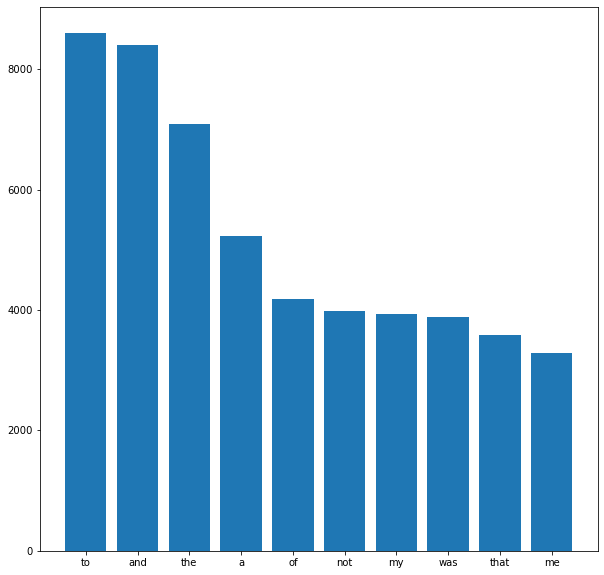

In [100]:
# Before removing checking occurances of stopwords in headline


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(content_df['content'])

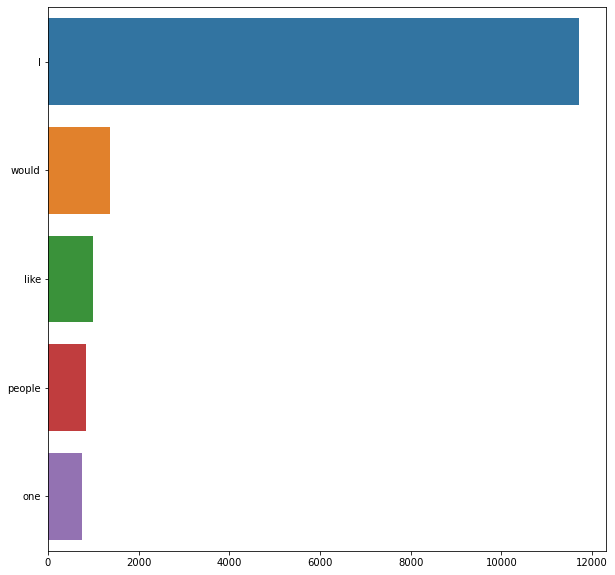

In [101]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(content_df['content'])

In [102]:
# Removing stopwords 
content_df['tokenized_title'] = content_df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
content_df['tokenized_title_join'] = [' '.join(map(str, l)) for l in content_df['tokenized_title']]

content_df.sample(250, random_state = 5)

content  \
248  So that is that?there is no actual help? No pr...   
104  Hello!I am new at the forum. I was feeling ver...   
612  So wonderful not to understand anything at all...   
132  What are you in for? Gang stalking to force ou...   
331  I moved into a flat next to university. I move...   
..                                                 ...   
648  well,i have alot of things going on in my life...   
71   Hello, I am a 18 nearly 19 year old female.I h...   
566     Why smart shy teens get almost always bullied?   
489  ok I am 20 and first of all i want to say it r...   
641  hi, I am 17 and I have been bullied for as lon...   

                                       tokenized_title  \
248  [So, ?, actual, help, ?, No, preventative, mea...   
104  [Hello, !, I, new, forum, ., I, feeling, ,, si...   
612  [So, wonderful, understand, anything, illness,...   
132  [What, ?, Gang, stalking, force, alters, ., Yo...   
331  [I, moved, flat, next, university, ., I, moved...   
..                                                 ...   
648  [well, ,, alot, things, going, life, example, ...   
71   [Hello, ,, I, 18, nearly, 19, year, old, femal...   
566  [Why, smart, shy, teens, get, almost, always, ...   
489  [ok, I, 20, first, want, say, really, sucks, w...   
641  [hi, ,, I, 17, I, bullied, long, remember, ,, ...   

                                  tokenized_title_join  
248  So ? actual help ? No preventative measures pr...  
104  Hello ! I new forum . I feeling , sick anxious...  
612  So wonderful understand anything illness leads...  
132  What ? Gang stalking force alters . You need p...  
331  I moved flat next university . I moved one guy...  
..                                                 ...  
648  well , alot things going life example work , s...  
71   Hello , I 18 nearly 19 year old female.I strug...  
566    Why smart shy teens get almost always bullied ?  
489  ok I 20 first want say really sucks writing he...  
641  hi , I 17 I bullied long remember , recent big...  

[250 rows x 3 columns]

In [103]:
#Lemetization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esalmna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [104]:
content_df['text_tokens_lemma'] = content_df['tokenized_title'].apply(lambda x: word_lemmatizer(x))

In [105]:
content_df['text_tokens_lemma'] [0]

['I',
 'come',
 'across',
 'article',
 'Michelle',
 'Borba',
 'thought',
 'could',
 'eventually',
 'helpful',
 'parent',
 "'s",
 'bullied',
 'child',
 '...',
 'victim',
 'I',
 'wish',
 'parent',
 'knew',
 'it.1',
 '.',
 'Listen',
 'gather',
 'fact',
 '.',
 'The',
 'first',
 'step',
 'often',
 'hardest',
 'parent',
 ':',
 'listen',
 'child',
 '’',
 'whole',
 'story',
 'without',
 'interrupting',
 '.',
 'Your',
 'goal',
 'try',
 'figure',
 'happened',
 ',',
 'involved',
 ',',
 'teasing',
 'took',
 'place',
 ',',
 'child',
 'teased',
 '.',
 'Unfortunately',
 ',',
 'teasing',
 'part',
 'growing',
 ',',
 'kid',
 'seem',
 'get',
 'fair',
 'share',
 'insult',
 '.',
 'If',
 'child',
 'appears',
 'immediate',
 'danger',
 ',',
 'keep',
 'listening',
 'find',
 'reacts',
 'bullying',
 '.',
 'By',
 'knowing',
 'reaction',
 'stop',
 'bully',
 ',',
 'offer',
 'child',
 'effective',
 'option.2',
 '.',
 'Teach',
 'bully-proofing',
 'strategy',
 '.',
 'What',
 'may',
 'work',
 'one',
 'child',
 'may',
 

In [106]:
# Noise reduction, special characters and lowering case etc.
import regex as re
content_df['content'] = content_df['content'].str.lower()
content_df['content']= content_df['content'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

content_df.sample(10, random_state = 5)

content  \
248  so that is thatthere is no actual help no prev...   
104  helloi am new at the forum i was feeling very ...   
612  so wonderful not to understand anything at all...   
132  what are you in for gang stalking to force out...   
331  i moved into a flat next to university i moved...   
494  we are looking for new mods for the abuse foru...   
480  i have been bullied before i was picked on in ...   
597  i was harrassed for years in school there was ...   
99   do you have an experience with a bully who is ...   
293  i am not sure whether this belongs here or not...   

                                       tokenized_title  \
248  [So, ?, actual, help, ?, No, preventative, mea...   
104  [Hello, !, I, new, forum, ., I, feeling, ,, si...   
612  [So, wonderful, understand, anything, illness,...   
132  [What, ?, Gang, stalking, force, alters, ., Yo...   
331  [I, moved, flat, next, university, ., I, moved...   
494  [We, looking, new, mods, Abuse, forums, ., The...   
480  [I, bullied, ., I, picked, 8th, grade, ,, big,...   
597  [I, harrassed, years, school, ,, especially, a...   
99   [Do, experience, bully, always, provoking, obs...   
293  [I, sure, whether, belongs, seems, closest, fi...   

                                  tokenized_title_join  \
248  So ? actual help ? No preventative measures pr...   
104  Hello ! I new forum . I feeling , sick anxious...   
612  So wonderful understand anything illness leads...   
132  What ? Gang stalking force alters . You need p...   
331  I moved flat next university . I moved one guy...   
494  We looking new mods Abuse forums . There globa...   
480  I bullied . I picked 8th grade , big kid playe...   
597  I harrassed years school , especially alot ver...   
99   Do experience bully always provoking observe r...   
293  I sure whether belongs seems closest fit quest...   

                                     text_tokens_lemma  
248  [So, ?, actual, help, ?, No, preventative, mea...  
104  [Hello, !, I, new, forum, ., I, feeling, ,, si...  
612  [So, wonderful, understand, anything, illness,...  
132  [What, ?, Gang, stalking, force, alters, ., Yo...  
331  [I, moved, flat, next, university, ., I, moved...  
494  [We, looking, new, mod, Abuse, forum, ., There...  
480  [I, bullied, ., I, picked, 8th, grade, ,, big,...  
597  [I, harrassed, year, school, ,, especially, al...  
99   [Do, experience, bully, always, provoking, obs...  
293  [I, sure, whether, belongs, seems, closest, fi...

In [107]:
# for sake of simplicity, showing 10 messages based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in content_df['tokenized_title'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('So', 'RB'), ('?', '.'), ('actual', 'JJ'), ('help', 'NN'), ('?', '.'), ('No', 'UH'), ('preventative', 'JJ'), ('measures', 'NNS'), ('protect', 'VBP'), ('bully', 'RB'), ('?', '.'), ('If', 'IN'), ('lasting', 'JJ'), ('damage', 'NN'), ('psyche', 'VB'), ('YOUR', 'NNP'), ('fault', 'NN'), ('thin', 'NN'), ('skinned', 'VBN'), ('?', '.'), ('Every', 'DT'), ('anti-bullying', 'NN'), ('forum', 'NN'), (',', ','), ('campaign', 'NN'), (',', ','), ('zero-tolerance', 'NN'), ('policy', 'NN'), (',', ','), ('effectively', 'RB'), ('useless', 'JJ'), ('long', 'JJ'), ('run', 'NN'), ('?', '.'), ('There', 'EX'), ('way', 'NN'), ('getting', 'VBG'), ('bullies', 'NNS'), ('reconcile', 'JJ'), ('actions', 'NNS'), ('know', 'VBP'), ('exactly', 'RB'), ('love', 'VB'), ('?', '.'), ('Bullies', 'NNS'), ('leave', 'VBP'), ('well', 'RB'), ('enough', 'RB'), ('alone', 'RB'), ('?', '.'), ('I', 'PRP'), ('broken', 'VBP'), ('confused', 'JJ'), ('years', 'NNS'), ('abuse', 'IN'), ('school', 'NN'), (',', ','), ('best', 'JJS'), ('thing', '

In [108]:
# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in c:\users\esalmna\anaconda3\lib\site-packages (1.1)


C:\Users\esalmna\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



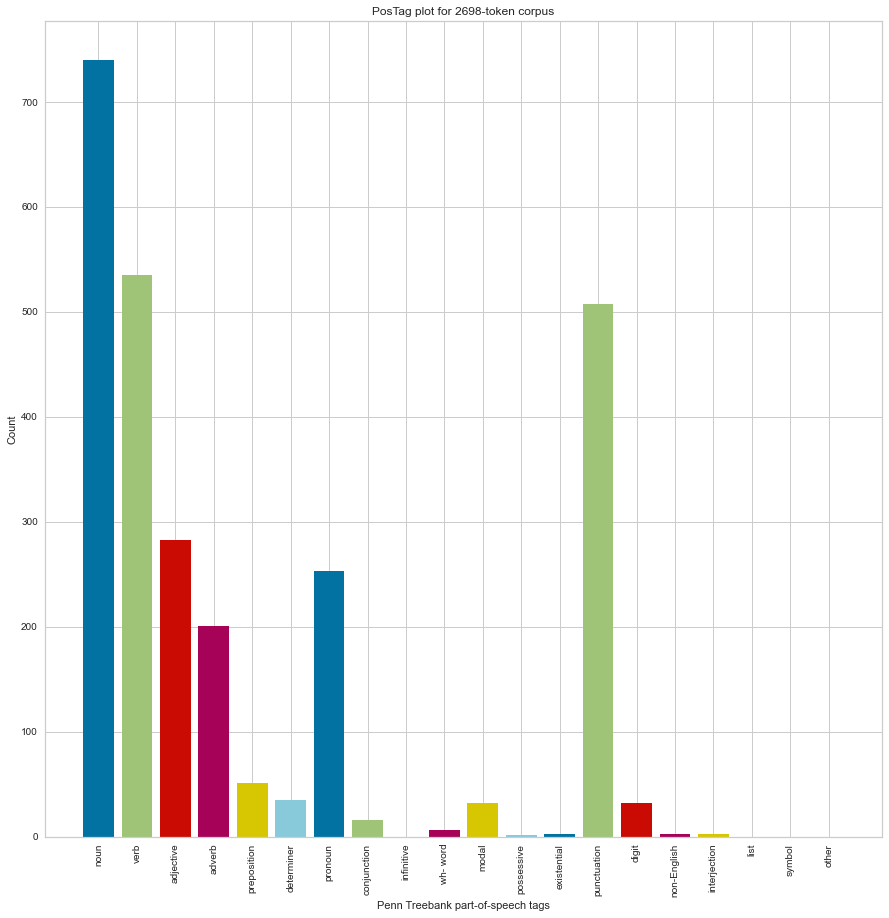

In [109]:
# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

Exploring some SpaCy functionalities

In [110]:
!pip install spacy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [113]:
import nltk 

for sentence in tagged_stanzas:
  print(sentence)
  pattern = "NP: {<DT>?<JJ>*<NN>}"
  NPChunker = nltk.RegexpParser(pattern) 
  result = NPChunker.parse(sentence)
  result.pprint()
  print()

[('So', 'RB'), ('?', '.'), ('actual', 'JJ'), ('help', 'NN'), ('?', '.'), ('No', 'UH'), ('preventative', 'JJ'), ('measures', 'NNS'), ('protect', 'VBP'), ('bully', 'RB'), ('?', '.'), ('If', 'IN'), ('lasting', 'JJ'), ('damage', 'NN'), ('psyche', 'VB'), ('YOUR', 'NNP'), ('fault', 'NN'), ('thin', 'NN'), ('skinned', 'VBN'), ('?', '.'), ('Every', 'DT'), ('anti-bullying', 'NN'), ('forum', 'NN'), (',', ','), ('campaign', 'NN'), (',', ','), ('zero-tolerance', 'NN'), ('policy', 'NN'), (',', ','), ('effectively', 'RB'), ('useless', 'JJ'), ('long', 'JJ'), ('run', 'NN'), ('?', '.'), ('There', 'EX'), ('way', 'NN'), ('getting', 'VBG'), ('bullies', 'NNS'), ('reconcile', 'JJ'), ('actions', 'NNS'), ('know', 'VBP'), ('exactly', 'RB'), ('love', 'VB'), ('?', '.'), ('Bullies', 'NNS'), ('leave', 'VBP'), ('well', 'RB'), ('enough', 'RB'), ('alone', 'RB'), ('?', '.'), ('I', 'PRP'), ('broken', 'VBP'), ('confused', 'JJ'), ('years', 'NNS'), ('abuse', 'IN'), ('school', 'NN'), (',', ','), ('best', 'JJS'), ('thing', '

In [114]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

Dependency Parsing

In [115]:
from spacy import displacy

for sentence in content_df['content'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)
  
  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

Sentence is:  so that is thatthere is no actual help no preventative measures to protect yourself from a bully if they because lasting damage to your psyche it is your fault for being so thin skinned every antibullying forum campaign and zerotolerance policy is effectively useless in the long run there is no way for getting bullies to reconcile their actions because they know exactly what they are doing and they love it bullies can not leave well enough alone i am broken and confused after years of abuse in school but the best thing i can do is suck it up ignore the intrusive thoughts the sleepless nights the feelings of inadequacy that have haunted me long after high school was over that is it huh


Sentence is:  helloi am new at the forum i was feeling very very sick and anxious about going to work tomorrow and i decided to join and read other stories people in my situation may share and also to ask for some hints or commentsat my first company we were a group from the same college and studies that started as interns and developed a career there we were really naive and the manager bullied most of us he was very paranoid working in a very toxic environment and he would think that we were lying to him or trying to trick him which was not true he was the worst person i have ever known as he used all the manual bully manager at work would do and enjoyed everytime very sadistically as we were very naive then my coworkers and i suffered this in very different ways mine was thinking that it was my fault that i should give 200 working much more and going to hr which did not work it eventually got me into trouble i developed health problems i lost my period my hair was extremely greasy i

Sentence is:  so wonderful not to understand anything at all because of an illness which leads to many problems bullying me around asking me for money i have been thrown against the ground and kickedpunched for nothing ran my heart out to get away from one while in sudden panic attack or something in that agenda soft scared transparent not all there slow is all it takes for any mess they do not care what is wrong with you as long as they fullfill their life not just in school anywhere you get into a car accident and you know it is the other persons fault and he or she would lie to get out of anything you could be poor useless and he could be rich and happy it would not matter life is not fair because of many reasons off topic oooops


Sentence is:  what are you in for gang stalking to force out alters you need permission from all parties you need permission from all parties involved this is a crime at the highest levelsi sincerely hope you guys do not lose yourselves even in the disorders you have so that your life is importanti believe you your important remain strong i love you no you do not deserve this gang stalking you done nothing wrong nothingi repeated this is not all dissociative identity disorder treatment plan it is trick ploy they are avoiding stalling trying to blame other alters some in the system has justified it because no one is that evil is iti am afraid it is


Sentence is:  i moved into a flat next to university i moved in with one guy a there was an empty room therein also the guy used to tell me how much water i must boil how i must close the microwavei must not use electricity wastefully and so forththere were two bathrooms i declared one as mine we lived but i was not very happy and wanted to move out but my contract made it a few weeks later a random guy b moved into the other room the guy shaved in my bathroom and did not wash his hair off i noticed him doing it often then i decided to confront him he was gone so i left a note i sent him a text message then he did it again and i left a rude note the next time i told him not to the other guy told me to wash the hair off and that i was being petty that hurt me the boys would leave dirty dishes and be off for like a monththe one time electricity went off and there was only guy b home when this happened b left blood in my washroom i told him to clean it when i returnedhe threatened to make

# Shallow Parsing using SpaCy

In [116]:
for sentence in content_df['content'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  so that is thatthere is no actual help no preventative measures to protect yourself from a bully if they because lasting damage to your psyche it is your fault for being so thin skinned every antibullying forum campaign and zerotolerance policy is effectively useless in the long run there is no way for getting bullies to reconcile their actions because they know exactly what they are doing and they love it bullies can not leave well enough alone i am broken and confused after years of abuse in school but the best thing i can do is suck it up ignore the intrusive thoughts the sleepless nights the feelings of inadequacy that have haunted me long after high school was over that is it huh
Chunked noun phrases found:  no actual help
Chunked noun phrases found:  no preventative measures
Chunked noun phrases found:  yourself
Chunked noun phrases found:  a bully
Chunked noun phrases found:  if they
Chunked noun phrases found:  lasting damage
Chunked noun phrases found:  your psyc

Chunked noun phrases found:  anything
Chunked noun phrases found:  an illness
Chunked noun phrases found:  many problems
Chunked noun phrases found:  me
Chunked noun phrases found:  me
Chunked noun phrases found:  money
Chunked noun phrases found:  i
Chunked noun phrases found:  the ground
Chunked noun phrases found:  nothing
Chunked noun phrases found:  my heart
Chunked noun phrases found:  sudden panic attack
Chunked noun phrases found:  something
Chunked noun phrases found:  that agenda
Chunked noun phrases found:  it
Chunked noun phrases found:  any mess
Chunked noun phrases found:  they
Chunked noun phrases found:  what
Chunked noun phrases found:  you
Chunked noun phrases found:  they
Chunked noun phrases found:  their life
Chunked noun phrases found:  school
Chunked noun phrases found:  you
Chunked noun phrases found:  a car accident
Chunked noun phrases found:  you
Chunked noun phrases found:  it
Chunked noun phrases found:  the other persons fault
Chunked noun phrases found:  

In [117]:
# Extract Verb Phrases
! pip install textacy

# Named Entity Recognition (NER) with SpaCy

In [118]:
import textacy
# import warnings
# warnings.filterwarnings("ignore")

pattern = r'(<VERB>?<ADV>*<VERB>+)'

for sentence in content_df['content'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)

  sentence_doc = textacy.make_spacy_doc(sentence, lang='en_core_web_sm')
  verb_phrases = textacy.extract.pos_regex_matches(sentence_doc, pattern)

  # Print all Verb Phrase
  for chunk in verb_phrases:
    print("Verb Phrase found: ",chunk.text)
  print()

Sentence is:  so that is thatthere is no actual help no preventative measures to protect yourself from a bully if they because lasting damage to your psyche it is your fault for being so thin skinned every antibullying forum campaign and zerotolerance policy is effectively useless in the long run there is no way for getting bullies to reconcile their actions because they know exactly what they are doing and they love it bullies can not leave well enough alone i am broken and confused after years of abuse in school but the best thing i can do is suck it up ignore the intrusive thoughts the sleepless nights the feelings of inadequacy that have haunted me long after high school was over that is it huh


C:\Users\esalmna\Anaconda3\lib\site-packages\textacy\extract.py:334: DeprecationWarning:

`pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.

C:\Users\esalmna\Anaconda3\lib\site-packages\textacy\extract.py:334: DeprecationWarning:

`pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.



Verb Phrase found:  protect
Verb Phrase found:  lasting
Verb Phrase found:  skinned
Verb Phrase found:  antibullying
Verb Phrase found:  getting
Verb Phrase found:  reconcile
Verb Phrase found:  know
Verb Phrase found:  doing
Verb Phrase found:  love
Verb Phrase found:  bullies can
Verb Phrase found:  leave
Verb Phrase found:  broken
Verb Phrase found:  confused
Verb Phrase found:  can
Verb Phrase found:  suck
Verb Phrase found:  ignore
Verb Phrase found:  nights
Verb Phrase found:  haunted

Sentence is:  helloi am new at the forum i was feeling very very sick and anxious about going to work tomorrow and i decided to join and read other stories people in my situation may share and also to ask for some hints or commentsat my first company we were a group from the same college and studies that started as interns and developed a career there we were really naive and the manager bullied most of us he was very paranoid working in a very toxic environment and he would think that we were lyin

C:\Users\esalmna\Anaconda3\lib\site-packages\textacy\extract.py:334: DeprecationWarning:

`pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.

C:\Users\esalmna\Anaconda3\lib\site-packages\textacy\extract.py:334: DeprecationWarning:

`pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.



Verb Phrase found:  feeling
Verb Phrase found:  going
Verb Phrase found:  work
Verb Phrase found:  decided
Verb Phrase found:  join
Verb Phrase found:  read
Verb Phrase found:  may share
Verb Phrase found:  ask
Verb Phrase found:  commentsat
Verb Phrase found:  started
Verb Phrase found:  developed
Verb Phrase found:  bullied
Verb Phrase found:  working
Verb Phrase found:  would think
Verb Phrase found:  lying
Verb Phrase found:  trying
Verb Phrase found:  trick
Verb Phrase found:  ever known
Verb Phrase found:  used
Verb Phrase found:  would
Verb Phrase found:  enjoyed
Verb Phrase found:  suffered
Verb Phrase found:  thinking
Verb Phrase found:  should give
Verb Phrase found:  working
Verb Phrase found:  going
Verb Phrase found:  hr
Verb Phrase found:  work
Verb Phrase found:  eventually got
Verb Phrase found:  developed
Verb Phrase found:  lost
Verb Phrase found:  felt
Verb Phrase found:  took
Verb Phrase found:  looking
Verb Phrase found:  found
Verb Phrase found:  looked
Verb Phras

Verb Phrase found:  moved
Verb Phrase found:  moved
Verb Phrase found:  used
Verb Phrase found:  tell
Verb Phrase found:  must boil
Verb Phrase found:  must close
Verb Phrase found:  must
Verb Phrase found:  use
Verb Phrase found:  declared
Verb Phrase found:  lived
Verb Phrase found:  wanted
Verb Phrase found:  move
Verb Phrase found:  made
Verb Phrase found:  moved
Verb Phrase found:  shaved
Verb Phrase found:  wash
Verb Phrase found:  noticed
Verb Phrase found:  doing
Verb Phrase found:  decided
Verb Phrase found:  confront
Verb Phrase found:  gone
Verb Phrase found:  left
Verb Phrase found:  sent
Verb Phrase found:  left
Verb Phrase found:  told
Verb Phrase found:  told
Verb Phrase found:  wash
Verb Phrase found:  hurt
Verb Phrase found:  would leave
Verb Phrase found:  went
Verb Phrase found:  happened
Verb Phrase found:  left
Verb Phrase found:  told
Verb Phrase found:  clean
Verb Phrase found:  returnedhe threatened
Verb Phrase found:  make
Verb Phrase found:  bough
Verb Phrase 

C:\Users\esalmna\Anaconda3\lib\site-packages\textacy\extract.py:334: DeprecationWarning:

`pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.



In [119]:
for sentence in content_df['content'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  so that is thatthere is no actual help no preventative measures to protect yourself from a bully if they because lasting damage to your psyche it is your fault for being so thin skinned every antibullying forum campaign and zerotolerance policy is effectively useless in the long run there is no way for getting bullies to reconcile their actions because they know exactly what they are doing and they love it bullies can not leave well enough alone i am broken and confused after years of abuse in school but the best thing i can do is suck it up ignore the intrusive thoughts the sleepless nights the feelings of inadequacy that have haunted me long after high school was over that is it huh



Sentence is:  helloi am new at the forum i was feeling very very sick and anxious about going to work tomorrow and i decided to join and read other stories people in my situation may share and also to ask for some hints or commentsat my first company we were a group from the same college and studies that started as interns and developed a career there we were really naive and the manager bullied most of us he was very paranoid working in a very toxic environment and he would think that we were lying to him or trying to trick him which was not true he was the worst person i have ever known as he used all the manual bully manager at work would do and enjoyed everytime very sadistically as we were very naive then my coworkers and i suffered this in very different ways mine was thinking that it was my fault that i should give 200 working much more and going to hr which did not work it eventually got me into trouble i developed health problems i lost my period my hair was extremely greasy 


Sentence is:  so wonderful not to understand anything at all because of an illness which leads to many problems bullying me around asking me for money i have been thrown against the ground and kickedpunched for nothing ran my heart out to get away from one while in sudden panic attack or something in that agenda soft scared transparent not all there slow is all it takes for any mess they do not care what is wrong with you as long as they fullfill their life not just in school anywhere you get into a car accident and you know it is the other persons fault and he or she would lie to get out of anything you could be poor useless and he could be rich and happy it would not matter life is not fair because of many reasons off topic oooops


C:\Users\esalmna\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.




Sentence is:  what are you in for gang stalking to force out alters you need permission from all parties you need permission from all parties involved this is a crime at the highest levelsi sincerely hope you guys do not lose yourselves even in the disorders you have so that your life is importanti believe you your important remain strong i love you no you do not deserve this gang stalking you done nothing wrong nothingi repeated this is not all dissociative identity disorder treatment plan it is trick ploy they are avoiding stalling trying to blame other alters some in the system has justified it because no one is that evil is iti am afraid it is



Sentence is:  i moved into a flat next to university i moved in with one guy a there was an empty room therein also the guy used to tell me how much water i must boil how i must close the microwavei must not use electricity wastefully and so forththere were two bathrooms i declared one as mine we lived but i was not very happy and wanted to move out but my contract made it a few weeks later a random guy b moved into the other room the guy shaved in my bathroom and did not wash his hair off i noticed him doing it often then i decided to confront him he was gone so i left a note i sent him a text message then he did it again and i left a rude note the next time i told him not to the other guy told me to wash the hair off and that i was being petty that hurt me the boys would leave dirty dishes and be off for like a monththe one time electricity went off and there was only guy b home when this happened b left blood in my washroom i told him to clean it when i returnedhe threatened to mak

In [120]:
for sentence in content_df['content'].sample(5, random_state = 5):
    sentence_doc = nlp(sentence)
    displacy.render(sentence_doc,style='ent',jupyter=True)
for ent in sentence_doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print()

two 244 247 CARDINAL

a few weeks later 362 379 DATE

one 820 823 CARDINAL

the next two weeks 1021 1039 DATE

one 1879 1882 CARDINAL

two weeks ago 2345 2358 DATE

the following week 2538 2556 DATE

22 3079 3081 CARDINAL



In [122]:
# #now let's take a look at first 25 messages to get a better context of NER extractions

for sentence in content_df['content'].sample(25, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)

Sentence is:  so that is thatthere is no actual help no preventative measures to protect yourself from a bully if they because lasting damage to your psyche it is your fault for being so thin skinned every antibullying forum campaign and zerotolerance policy is effectively useless in the long run there is no way for getting bullies to reconcile their actions because they know exactly what they are doing and they love it bullies can not leave well enough alone i am broken and confused after years of abuse in school but the best thing i can do is suck it up ignore the intrusive thoughts the sleepless nights the feelings of inadequacy that have haunted me long after high school was over that is it huh


Sentence is:  helloi am new at the forum i was feeling very very sick and anxious about going to work tomorrow and i decided to join and read other stories people in my situation may share and also to ask for some hints or commentsat my first company we were a group from the same college and studies that started as interns and developed a career there we were really naive and the manager bullied most of us he was very paranoid working in a very toxic environment and he would think that we were lying to him or trying to trick him which was not true he was the worst person i have ever known as he used all the manual bully manager at work would do and enjoyed everytime very sadistically as we were very naive then my coworkers and i suffered this in very different ways mine was thinking that it was my fault that i should give 200 working much more and going to hr which did not work it eventually got me into trouble i developed health problems i lost my period my hair was extremely greasy i

Sentence is:  so wonderful not to understand anything at all because of an illness which leads to many problems bullying me around asking me for money i have been thrown against the ground and kickedpunched for nothing ran my heart out to get away from one while in sudden panic attack or something in that agenda soft scared transparent not all there slow is all it takes for any mess they do not care what is wrong with you as long as they fullfill their life not just in school anywhere you get into a car accident and you know it is the other persons fault and he or she would lie to get out of anything you could be poor useless and he could be rich and happy it would not matter life is not fair because of many reasons off topic oooops


Sentence is:  what are you in for gang stalking to force out alters you need permission from all parties you need permission from all parties involved this is a crime at the highest levelsi sincerely hope you guys do not lose yourselves even in the disorders you have so that your life is importanti believe you your important remain strong i love you no you do not deserve this gang stalking you done nothing wrong nothingi repeated this is not all dissociative identity disorder treatment plan it is trick ploy they are avoiding stalling trying to blame other alters some in the system has justified it because no one is that evil is iti am afraid it is


Sentence is:  i moved into a flat next to university i moved in with one guy a there was an empty room therein also the guy used to tell me how much water i must boil how i must close the microwavei must not use electricity wastefully and so forththere were two bathrooms i declared one as mine we lived but i was not very happy and wanted to move out but my contract made it a few weeks later a random guy b moved into the other room the guy shaved in my bathroom and did not wash his hair off i noticed him doing it often then i decided to confront him he was gone so i left a note i sent him a text message then he did it again and i left a rude note the next time i told him not to the other guy told me to wash the hair off and that i was being petty that hurt me the boys would leave dirty dishes and be off for like a monththe one time electricity went off and there was only guy b home when this happened b left blood in my washroom i told him to clean it when i returnedhe threatened to make

Sentence is:  we are looking for new mods for the abuse forums there is a global announcement about it which i have linked to below if you think you meet the criteria please pm one of us and let us know you are interestedannouncestopic64277htmlmuch appreciatedcracked


Sentence is:  i have been bullied before i was picked on in 8th grade by a big kid who played football and wrestled the kid sat behind me in homeroom and in several of my classes one of which was gym i was picked on in front of an audience every day verbally i could not do anything i was so powerlessi have not been the same person ever since i was relatively quiet but i talked enough where everyone knew me and liked me because i was very down to earth and i minded my own business after being bullied i was very reclusive i had no selfesteem whatsoever i did not join clubs play sports or make any friends i felt bitter towards everyone believing that they were far less mature than me my grades did not suffer however because i tried very hard in school so i could give my bully good homework answerswhen i got to high school i rekindled friendships with people that i was friends with way back during elementary school however our shared interest was partying and doing drugs at the time i thou

Sentence is:  i was harrassed for years in school there was especially alot of verbal abuse sometimes i would think some kids were my friends just to be cruelly rejectedi reacted with growin a thick skin ignoring my surroundings in school and secretly and sometimes openly hating them i was too proud to tell anyone i knew i was better than them and thought i did not need any help against that thrash i am not a timid person in any sense of the word i have a very high self esteem sometimes i would explode in a psychotic fit and beat someone upmy stepmother was not much better with her thinly veiled disaproval of me she would not show it on the outside but i know her and her manipulative tactics always will she demonstrate her selflessness loudly in an effort to get love an appraisalwell it is now four years past my school time and i am a loner even when i know people for a long time i never open up to them emotionally i barely tell them anything about me and do not feel any desire to do s

Sentence is:  do you have an experience with a bully who is always provoking you than observe your reaction so he can steal that reaction from you so he can play a believable victim


Sentence is:  i am not sure whether this belongs here or not but it seems the closest fit for the questioni am genuinely wondering whether to kill someone or commit suicide after nearly a decade of being humiliated and put down i have also experienced a few physical attacks but ironically am not so bothered by these as i got out of them unscathed and they did not actually seem to affect that sense of being worthwhile i have attacked people who provoke me it seems pointless but it just happens like an automatic reflex i am torn between feeling guilty and wanting to stop and finding it aggrandising and wanting to progress to murder i would prefer to choose people i know who have pissed me off rather than strangers and would not dream of killing the 'innocent' it is kind of difficult to explain sometimes i do not actually want to kill that much but it seems necessary as it is the best means of empowerment if i do not i will keep on being this unmanly weak pathetic person who is always pic

Sentence is:  btw i am new here and made an account just for this i would like to say beforehand sorry for any ignorance or inappropriate  so i have a little sister that is in middle school we fight a lot and i am not going to lie i have been pretty mean to her that does not mean she is not important to me and i have told her that i should be the only one who is mean to her and to let me know if anyone does something  i know that is mean but it was more of a joke anyways i had a glimpse of her social media and i saw few nasty comments this can be counted as cyber bullying this had me angrier than ever i confronted the boy and he laughed it off and told me to chill that is when i snapped and ended up pinning him against the wall and telling him if he ever gets near my sister or does something again ill find him and make him wish he was never a live i did get a little carried away but things he was saying to my sister was disgusting my sister ended up finding out i did this and was very 

Sentence is:  this is an incident of bullying in which no one actually physically harmed me i have spent my entire life in a major city as an asian person i have noticed that whites and blacks openly make racist remarks against asians and no one cares i tried to protest against this aggressively and i was marked as a troublemaker however when i made racist remarks against whites and blacks people used aggressive protest against me this was considered perfectly acceptable this double standard has resulted in endless pain ever since i was twelve years old i tried to use peaceful protest and no one cared i tried to use aggressive protest and i was regarded as a hostile person this is a loselose situation and unfortunately there is little i can do about it because white people and black people are so much more powerful than asians in this country i am feeling hopeless this is far worse than any amount of physical damage they could have inflicted on me


Sentence is:  well i am new here please go easy on me ya'lli do not know how to describe the problem that i have or had it is so long and complicated it would be hard to follow if i wrote everything out herei will try to do the cliffnotes versioni met a guy yes we are both adults over 21 on myspace i am not sure if you could exactly call what was going on a thing it is hard to describe and i myself have a hard time understanding iti thought we might eventually speak and meet he kept leading me to believe we might for weekshowever i could not get clear on the fact that he was either single or married i think he was trying to confuse me on purpose he was playing games with me i dropped him as a friend and went back twice both times he still would not be clear about his marital statusthe last time i went back to be his friend he said again he was married been that way for 15 years then he started outlining all his sexual escapades over the worldto say i was angry was putting it lightly i 

Sentence is:  heyi myself have had experience of bullying and the terrible things it can do to your self esteem part of the reason i wanted to become a graphic designer was to communicate about important issues to people to touch them and help people in difficult situations i finally got my dream and am doing an advertising campaign on bullying but i feel going on my experience alone does not give me a good enough picture when trying to communicate with different audiencesthe main thing i want to know is if it is not to painful is one of your worst experience the things that were said cruel comments etc and done to you and the way you feltalso if you have any ideas what i could put in my advertising awareness campaign let me know thank you for any help you can give me it would be much appreciated


Sentence is:  i would consider it more emotional abuse than is it bullying but both can work i suppose i have a friendyes a friend not me and she has a friend named kevin kevin and her have been fighting for the past couple of months now and she is been asking me for advice about it i have been in these situations i had a physicallyemotionally abusive best friend for 67 years and an emotionally abusive boyfriend for 4 years so i am familiar with the signs kevin treats my friend like crap all the time he calls her names and makes her feel terrible about herself then blames it on his bad day or his depression or something he recently told her that she is the only reason he does not kill himself so while she does not want to be friends with him anymore she is scared if she leaves he is going to commit suicide kevin told her about a month ago that he is in love with her and i just think he is obsessed with her he hates me because this girl and i used to date and now that she is drawn the l

Sentence is:  i am a 19year old girl and i have been through a lot of rejection in my life and it has left me utterly traumatised i was bullied so badly at school that i dropped out when i was just 15years old and i never even got to sit my gcses when i was 15 my 40year old halfbrother used to have sex with me and my mum told me to tell the police that he raped me which i did the following day i dropped the charges and i have not seen him since even though my halfbrother treated me less than the dust on the earth i still love him i am obsessed with him and i think about him everyday and i am utterly heartbroken then last year i ended up getting bullied on facebook by my halfbrother's inlaws they are aware that we fell out but they do not know that he used to have sex with me at 15 they would call me fat ugly a slut a tosser and i do not forget any of them words i believe them i think about them everyday and i do not think that i can ever forget them because i dropped out of school so y

Sentence is:  there is much more to this story but i will try to get right to the pointwe have been a part of a social group since my oldest son was 1 and he is now 7 the kids separated schools upon elementary school but maintained a social relationship and have played sports together since they were 4 12 we had a falling out with one of the couples the dad happened to be my son's soccer coach last fall he told my son he was going to have him kicked off the teammy son wanted to play bb with his friends in the winter and this dad not the coach of this team told the sports org he did not want him on the team and the sports org obliged now it is time to play soccer again this dad is the coach he fought to have my son kicked off the team and wonfor what it is worth all the kids get alongi tried to explain to the sports org that has core values of 'integrity' 'inclusivity' and 'safety' that they were supporting exclusionary bullying my son has done nothing wrong i thought the coach should b

Sentence is:  i have had problems with white people for a while i grew up with them and they were constantly making fun of me because of my race however when i made fun of them in return they would get really angry and try to censor me by reporting me to the teachers of course the teachers were also white and they sided with them i hate how they have this double standard when they make fun of my ethnicity it is all fun and games to them but when i make fun of their race they gang up on me cowards they seem to have an aversion to freedom of speech they only do what benefits them they also like to suck up a lot in order to make money what sycophants i for one do not back down when they try to censor me i say racist stuff about them all the time and no amount of bullying will stop me


Sentence is:  i am a sophmore in high school and i currently get bullied because of my namei am not going to tell you guys my name simply because i am embarassed yeah i am ashamed of myself and the name that my parents have given meit is not physical bullying mainly verbaltrust me i have tried to ignore it i have tried to just walk away but the kids who do it take the transportation services that pass by my houseeverytime they make fun of me i just laugh it off with them or try and make it seem like nothing is bothering mei am not very strong i am quite weak i am a vegetarian so i do not have any musclethe things these kids say to me has gotten me to cry for a couple of nights know but they make me feel like what they are saying is true and people have tld me that it is not true blah blah ur better then that just ignore the people who make fun of oyubut the thing is i think i am depressed because of bullyingall my life i have to look foward to people harassing me because of my name and

Sentence is:  hi so i was picked on a fair amount in my adolescence i am 21 now there was one incident that i allways just thought of as another in a long string of bullying incidints but now i am like seeing it as the sexual assualt  rape that it was two kids who i knew did not like me invited me to sleep over when i was 12 and in the morning sexually assualted me with a broom i am wondering if anyone knows any resources for this type of situation thanks


Sentence is:  if anyone knows of anything please let me know i do not have kids but i have been a victim of bullying which led to a couple other conditions but i am hoping to gather some more information to start in the near future and try to help make a difference in schools just watched the movie bully today and these kids were sooo precious it was extremely sad and hard to watch


Sentence is:  i was bullied in school that was about 1510 years ago i never thought it had very serious consequences because i moved away and on with my lifedreams and have never talked to those people again and in my mind i have forgiven them at least so i thought but one thing that is bothering me more and more is close relationships and feeling desirable i am female in my mid 20s and i have had one boyfriend although he told me he loved me and was very kind and caring i just could not handle that i could not feel desirable then i broke up with him because i felt he wanted too much of me which i could not give since then i have not had absolutely anything like a relationship i have not even had any long meaningful conversations with opposite sex it is not that i did not like men i do on pictures in videos on facebook celebrities but in real life i never feel that a man could ever like me more than a buddy i am not scared of them either  i talk to men freely but only about work and bu

Sentence is:  hey guys when i saw the bullying forum section i felt like i instantly needed to post this i was severely bullied from elementary school all through middle school and it finally stopped my junior year of high school at the time i thought that i would never be able to make it through but look where i am now i am a college student and i want to help other people by telling my story so i need some opinionsdo you guys think i should start a special section of my blog for this and start telling my story please i would love to hear your suggestions


Sentence is:  hi my name is tierra and i am 17 years old i used to get bullied all the way until i turned 16 i was basically considered the nerd of the school because my mom could not afford to buy me regular good looking glassesshe had to buy me big thick glassesthe kind that old people wore i always used to get teased for wearing them so i would not wear them anymore which made me do poorly in school because i was not able to do my work without my glasses also when i was younger i would always pee my pants and i would get teased so much for that there were days my mom did not even make me go to school the next day because we both knew i was going to get teased also i would get bullied for the clothes i wore because i was so skinny and all of my clothes were baggy on me and i seriously looked like i lived on the streets everyday before school me and my younger brother would go dumpster diving for food because we were so hungry so we smelled really bad by the time we got to school afte

Sentence is:  on april 18 2005 in the coat room of my son's third grade class my son was choked by a classmate since that incident my son has spent a week in the hospital as i write this my son is lying in a hospital bed with a fever a serious infection and a scar on his neck where doctors had to perform emergency surgery to drain fluids that were beginning to cut off the flow of blood and his ability to breathei am told that my son is a victim of grade school bullyingand i am confusedis it grade school bullying that causes my son to walk home across town because he is afraid to ride the bus home from school and has been since shortly after he started third grade is it grade school bullying that he is now terrified to ever have to go back to school where he is essentially on his own how can i as a parent ever make my child feel secure when the public school does nothing to protect him where else in society is the type of incident that occurred between my son and this other boy resolved

# NGRAM

In [123]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

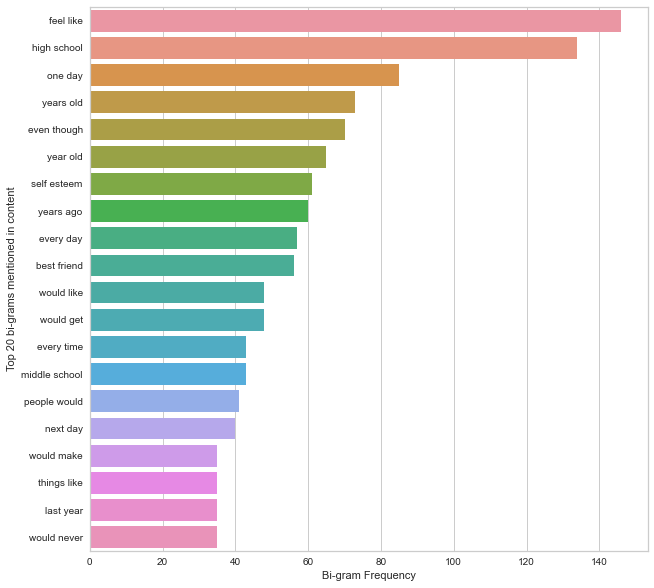

In [124]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in content")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(content_df['tokenized_title_join'],2)

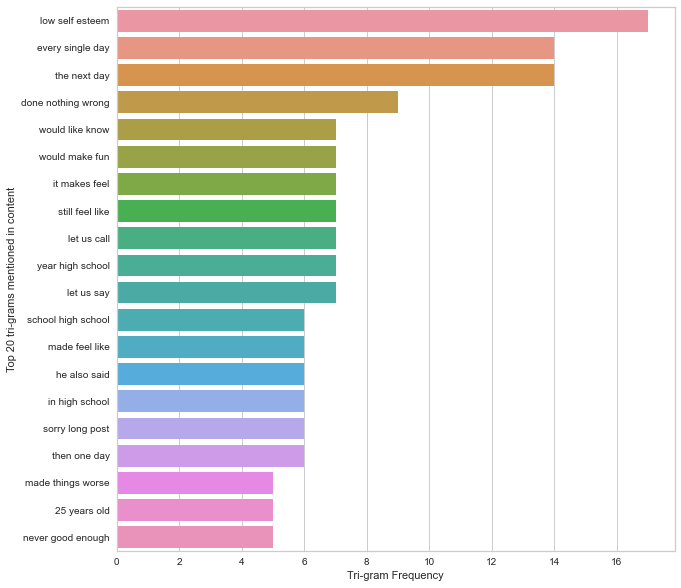

In [125]:
#Tri-grams 

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in content")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(content_df['tokenized_title_join'],3)

# NLP-Part2
Code implementation for below topics:

TF-IDF
Bag-of-Words (BOW)
Document Similarity - Use Cases

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [127]:
text_content = content_df['tokenized_title_join']
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             #min_df=8,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )

In [128]:
print(vector)

TfidfVectorizer(max_df=0.3, stop_words='english')


In [129]:
content_subset = text_content[0:100]
tfidf_subset = vector.fit_transform(content_subset)

In [130]:
tfidf_subset = tfidf_subset.toarray()

vocab = vector.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tfidf_subset, 2), columns=vocab)
tfidf_df

000   10  100  1000000   11   12   14  140   15   16  ...  yell  yelled  \
0   0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
1   0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
2   0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
3   0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
4   0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.06     0.0   
..  ...  ...  ...      ...  ...  ...  ...  ...  ...  ...  ...   ...     ...   
95  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
96  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
97  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
98  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   
99  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00     0.0   

    yelling   yes  yesterday  young  younger  youngest  yousharpie22  zoo  
0       0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
1       0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
2       0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
3       0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
4       0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
..      ...   ...        ...    ...      ...       ...           ...  ...  
95      0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
96      0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
97      0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  
98      0.0  0.03        0.0    0.0      0.0       0.0           0.0  0.0  
99      0.0  0.00        0.0    0.0      0.0       0.0           0.0  0.0  

[100 rows x 3407 columns]

In [131]:
tfidf_subset.shape

(100, 3407)

In [132]:
#count of the words
print(vocab)

['000', '10', '100', '1000000', '11', '12', '14', '140', '15', '16', '17', '17yo', '18', '19', '20', '2004', '2007', '2008', '2011', '2019', '20s', '22', '22years', '24', '25', '250lbs', '2nd', '30', '35', '40', '400', '400lb', '45', '49', '4th', '500lbs', '6am', '70s', 'aarrrrrrrrggggggggg', 'aba', 'ability', 'able', 'abruptly', 'absolute', 'absolutely', 'absolution', 'absorbed', 'absurd', 'abuse', 'abused', 'abuser', 'abusers', 'abusive', 'abysmally', 'academic', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accidental', 'accidentally', 'accomplished', 'accomplishing', 'accomplishments', 'according', 'accosted', 'account', 'accountant', 'accounts', 'accusatory', 'accuse', 'accused', 'accusing', 'accustomed', 'aced', 'ache', 'achieved', 'achieving', 'acknowledge', 'acknowledged', 'acknowledging', 'acquaintances', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'activities', 'activity', 'acts', 'actual', 'actually', 'add', 'added', 'addic

# Bag of Words(BOW)

In [133]:
content_df_random = content_df['tokenized_title_join'] # remove  this part and use whole data set *.sample(100)*
content_df_random

0      I come across article Michelle Borba thought c...
1      Hi ! In thread , take little time thank someon...
2      Current Surveys / Studies / Call participants ...
3      This thread purely information purposes althou...
4      Help ... This crisis ... matter fact biggest c...
                             ...                        
669    HI , picked fair amount adolescence ( I 21 ) T...
670    Hi , I new need advice . I recieve regular bul...
671    Hi , created new website helping people bullyi...
672    Welcome PsychForums.com ! The rules simple , o...
673    So I know couple ( family friends , call frien...
Name: tokenized_title_join, Length: 674, dtype: object

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer()

In [135]:
corpus_bow = content_df_random
X_bow = vectorizer_bow.fit_transform(corpus_bow)

In [136]:
print(vectorizer_bow.get_feature_names())

['00', '000', '02', '07svensry', '0no', '10', '100', '1000', '1000000', '100mg', '10th', '11', '110', '11pm', '11th', '11yo', '12', '120male', '122', '12th', '13', '130kg', '137', '14', '140', '142', '14y', '15', '150', '15yo', '16', '16th', '16yrs', '17', '17practically', '17yo', '18', '18yo', '19', '1950', '1988', '1990', '1994', '1997', '19lt', '1month', '1st', '20', '200', '2001', '2002', '2003', '2004', '2005', '2007', '2008', '2009', '200k', '200mg', '2010', '2011', '2012', '2013', '2014', '2015', '2019', '20mg', '20s', '20th', '21', '21questions', '22', '22years', '23', '24', '25', '250', '250lbs', '25th', '26', '260', '27', '28', '29', '2am', '2k', '2nd', '30', '300', '30am', '30k', '30kgs', '30min', '30s', '33', '34', '35', '36', '3am', '3pm', '3rd', '40', '400', '400lb', '400mg', '40s', '41', '42', '45', '45min', '48', '49', '4am', '4chan', '4th', '4years', '50', '500', '500lbs', '504', '50years', '53', '55', '56', '5htp', '5mins', '5pm', '5th', '5yrs', '60', '600', '61', '64

In [137]:
print(X_bow.shape)

(674, 11723)


In [138]:
print(X_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [139]:
doc_term_matrix = X_bow.todense()
doc_term_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [140]:
content_df_subset = content_df['tokenized_title_join']
content_df_subset[0:100]
content_df_subset.head()

0    I come across article Michelle Borba thought c...
1    Hi ! In thread , take little time thank someon...
2    Current Surveys / Studies / Call participants ...
3    This thread purely information purposes althou...
4    Help ... This crisis ... matter fact biggest c...
Name: tokenized_title_join, dtype: object

In [141]:
corpus_bow_subset = content_df_subset
X_bow_subset = vectorizer_bow.fit_transform(corpus_bow_subset)

In [142]:
print(vectorizer_bow.get_feature_names())

['00', '000', '02', '07svensry', '0no', '10', '100', '1000', '1000000', '100mg', '10th', '11', '110', '11pm', '11th', '11yo', '12', '120male', '122', '12th', '13', '130kg', '137', '14', '140', '142', '14y', '15', '150', '15yo', '16', '16th', '16yrs', '17', '17practically', '17yo', '18', '18yo', '19', '1950', '1988', '1990', '1994', '1997', '19lt', '1month', '1st', '20', '200', '2001', '2002', '2003', '2004', '2005', '2007', '2008', '2009', '200k', '200mg', '2010', '2011', '2012', '2013', '2014', '2015', '2019', '20mg', '20s', '20th', '21', '21questions', '22', '22years', '23', '24', '25', '250', '250lbs', '25th', '26', '260', '27', '28', '29', '2am', '2k', '2nd', '30', '300', '30am', '30k', '30kgs', '30min', '30s', '33', '34', '35', '36', '3am', '3pm', '3rd', '40', '400', '400lb', '400mg', '40s', '41', '42', '45', '45min', '48', '49', '4am', '4chan', '4th', '4years', '50', '500', '500lbs', '504', '50years', '53', '55', '56', '5htp', '5mins', '5pm', '5th', '5yrs', '60', '600', '61', '64

In [143]:
print(X_bow_subset.shape)

(674, 11723)


In [144]:
print(X_bow_subset.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [145]:
vectorizer_bow_subset_2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_bow_subset_2 = vectorizer_bow_subset_2.fit_transform(corpus_bow_subset)

In [146]:
print(vectorizer_bow_subset_2.get_feature_names())

['00 am', '00 fake', '00 its', '00 pm', '000 dollar', '000 dollars', '000 euros', '000 kilometers', '000 miles', '000 people', '000 still', '02 bullying', '02 psychologist', '07svensry mail', '0no votes', '0no voteshave', '10 000', '10 11', '10 12', '10 15', '10 20', '10 2011', '10 2019', '10 active', '10 always', '10 another', '10 became', '10 being', '10 believe', '10 bullied', '10 children', '10 cm', '10 darkest', '10 days', '10 employees', '10 feet', '10 friends', '10 heavily', '10 in', '10 main', '10 minutes', '10 months', '10 moved', '10 parents', '10 people', '10 really', '10 talked', '10 the', '10 within', '10 year', '10 years', '10 your', '100 000', '100 born', '100 certain', '100 clear', '100 convinced', '100 interactions', '100 jackass', '100 kids', '100 likely', '100 live', '100 miles', '100 people', '100 scared', '100 sure', '100 thinking', '100 time', '100 times', '100 told', '100 vulnerable', '1000 am', '1000 bucks', '1000 pupils', '1000000 thoughts', '100mg setraline', 

In [148]:
len(vectorizer_bow_subset_2.get_feature_names())

100608

In [149]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


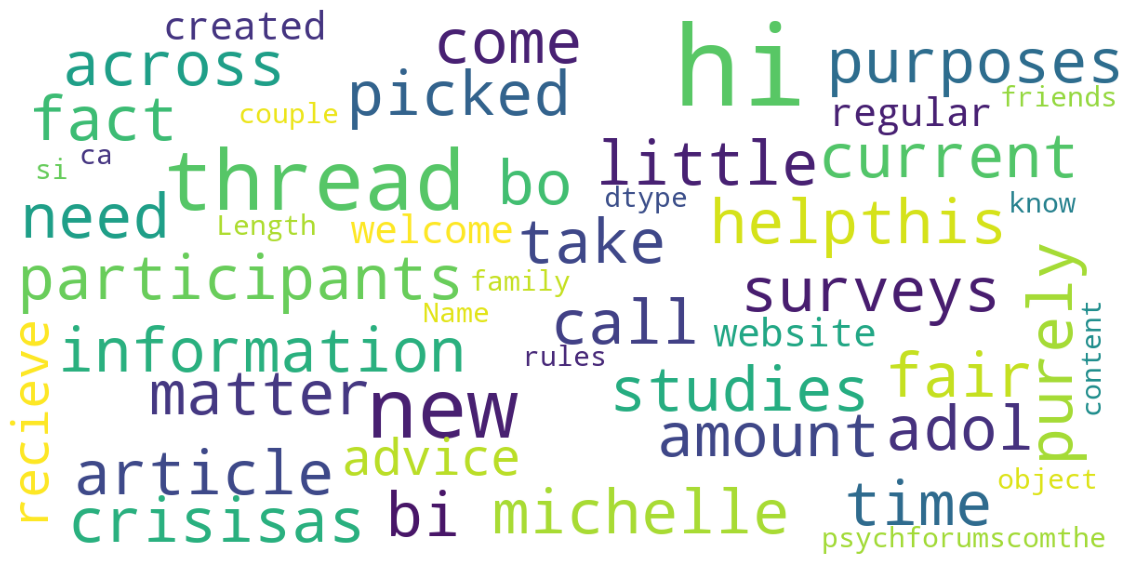

In [258]:
# wordcloud function
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
# print wordcloud
show_wordcloud(content_df["content"])

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(vectorizer_bow_subset_2)


# Document Similarity - Use Cases
Euclidean Distance
Cosine Similarity
Jaccard Similarity
Document Clustering
Topic Models

In [150]:
from sklearn.metrics.pairwise import euclidean_distances

In [151]:
tfidf_subset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
euclidean_content = euclidean_distances(tfidf_subset, tfidf_subset)
euclidean_content

array([[0.        , 1.40821779, 1.41421356, ..., 1.39124493, 1.37589885,
        1.38326973],
       [1.40821779, 0.        , 1.41421356, ..., 1.41421356, 1.38520174,
        1.41421356],
       [1.41421356, 1.41421356, 0.        , ..., 1.40536898, 1.4098774 ,
        1.41421356],
       ...,
       [1.39124493, 1.41421356, 1.40536898, ..., 0.        , 1.37429849,
        1.41421356],
       [1.37589885, 1.38520174, 1.4098774 , ..., 1.37429849, 0.        ,
        1.41216049],
       [1.38326973, 1.41421356, 1.41421356, ..., 1.41421356, 1.41216049,
        0.        ]])

In [153]:
from sklearn.metrics.pairwise import cosine_similarity

In [154]:
cosine_content = cosine_similarity(tfidf_subset, tfidf_subset)
cosine_content

array([[1.        , 0.00846133, 0.        , ..., 0.03221877, 0.05345117,
        0.04328243],
       [0.00846133, 1.        , 0.        , ..., 0.        , 0.04060807,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01246901, 0.00612286,
        0.        ],
       ...,
       [0.03221877, 0.        , 0.01246901, ..., 1.        , 0.05565184,
        0.        ],
       [0.05345117, 0.04060807, 0.00612286, ..., 0.05565184, 1.        ,
        0.00290138],
       [0.04328243, 0.        , 0.        , ..., 0.        , 0.00290138,
        1.        ]])

In [155]:
from sklearn.metrics import  jaccard_score, pairwise_distances

In [156]:
jaccard_la = content_df[content_df['tokenized_title_join'].str.contains('asl')]
jaccard_la = jaccard_la['tokenized_title_join']
jaccard_la

20     Hi , I used post online forum exchanged emails...
234    I moved dad 's 1 bedroom condo 5 years ago mov...
243    I sure right board particular topic , `` bully...
419    [ color= # BF0000 ] WARNING-Could Trigger [ /c...
476    Something I thinking lately . As child , back ...
563    I moved new city mom 's job moved . I lived au...
Name: tokenized_title_join, dtype: object

In [157]:
jaccard_ca = content_df[content_df['tokenized_title_join'].str.contains('pics')]
jaccard_ca = jaccard_ca['tokenized_title_join']
jaccard_ca_shortened = jaccard_ca[0:771]
jaccard_ca_shortened

153    aunt mine son law , taken pics brother without...
188    Hello everyone ! I ShadowSelf , recently joine...
193    Hello , I recently moved small company I worki...
203    Hi , story pretty long especially since story ...
268    I working 1 year 4 months medical-related offi...
312    Hi , I female bullied closest friends years gr...
317    I friend , Mark , I known worked 8 years . He ...
338    I bullied child , reading lot topics website ,...
371    What physical bullying , interference , etc , ...
386    3 years ago , I met guy online . He normal per...
435    After seeing stupid public outcry recent artic...
472    Well , title pretty much sums . I bullied last...
493    Hi , everyone ! In thread , take time introduc...
572    Sorry posting similar topics.In grade 8 became...
Name: tokenized_title_join, dtype: object

In [158]:
#data is labelled
jaccard_content = jaccard_score(jaccard_la, jaccard_ca_shortened, average=None)
jaccard_content

ValueError: Found input variables with inconsistent numbers of samples: [6, 14]

In [159]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [160]:
Z = linkage(cosine_content, 'ward')
pd.DataFrame(Z, columns=['Cluster 1', 'Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

Cluster 1 Cluster 2 Distance Cluster Size
0         62        63        0            2
1         77        98  1.06267            2
2          0         3  1.08928            2
3         50        67  1.14739            2
4          7        72  1.17173            2
..       ...       ...      ...          ...
94       172       192  1.79587           32
95       150       194  1.81379           36
96       186       193  1.88273           62
97       195       196  2.50159           98
98       100       197  2.80235          100

[99 rows x 4 columns]

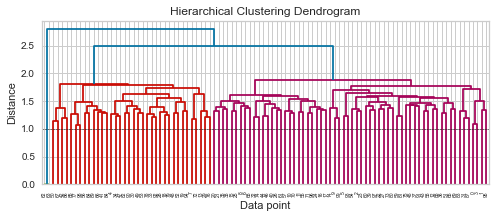

In [161]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [162]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([content_df, cluster_labels], axis=1)

content  \
0    i have come across this article by michelle bo...   
1    hi in this thread you can take a little time t...   
2    current surveys  studies  call for participant...   
3    this thread is purely for information purposes...   
4    helpthis is a crisisas a matter of fact the bi...   
..                                                 ...   
669  hi so i was picked on a fair amount in my adol...   
670  hi i am new and need advice i recieve regular ...   
671  hi there i created a new website that is for h...   
672  welcome to psychforumscomthe rules here are si...   
673  so i know this couple family friends if you ca...   

                                       tokenized_title  \
0    [I, come, across, article, Michelle, Borba, th...   
1    [Hi, !, In, thread, ,, take, little, time, tha...   
2    [Current, Surveys, /, Studies, /, Call, partic...   
3    [This, thread, purely, information, purposes, ...   
4    [Help, ..., This, crisis, ..., matter, fact, b...   
..                                                 ...   
669  [HI, ,, picked, fair, amount, adolescence, (, ...   
670  [Hi, ,, I, new, need, advice, ., I, recieve, r...   
671  [Hi, ,, created, new, website, helping, people...   
672  [Welcome, PsychForums.com, !, The, rules, simp...   
673  [So, I, know, couple, (, family, friends, ,, c...   

                                  tokenized_title_join  \
0    I come across article Michelle Borba thought c...   
1    Hi ! In thread , take little time thank someon...   
2    Current Surveys / Studies / Call participants ...   
3    This thread purely information purposes althou...   
4    Help ... This crisis ... matter fact biggest c...   
..                                                 ...   
669  HI , picked fair amount adolescence ( I 21 ) T...   
670  Hi , I new need advice . I recieve regular bul...   
671  Hi , created new website helping people bullyi...   
672  Welcome PsychForums.com ! The rules simple , o...   
673  So I know couple ( family friends , call frien...   

                                     text_tokens_lemma  ClusterLabel  
0    [I, come, across, article, Michelle, Borba, th...          96.0  
1    [Hi, !, In, thread, ,, take, little, time, tha...          98.0  
2    [Current, Surveys, /, Studies, /, Call, partic...          69.0  
3    [This, thread, purely, information, purpose, a...          97.0  
4    [Help, ..., This, crisis, ..., matter, fact, b...          17.0  
..                                                 ...           ...  
669  [HI, ,, picked, fair, amount, adolescence, (, ...           NaN  
670  [Hi, ,, I, new, need, advice, ., I, recieve, r...           NaN  
671  [Hi, ,, created, new, website, helping, people...           NaN  
672  [Welcome, PsychForums.com, !, The, rule, simpl...           NaN  
673  [So, I, know, couple, (, family, friend, ,, ca...           NaN  

[674 rows x 5 columns]

In [163]:
from sklearn.decomposition import LatentDirichletAllocation

In [164]:
lda = LatentDirichletAllocation(max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(X_bow)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'])
features

KeyboardInterrupt: 

In [ ]:
features.

In [190]:
from sklearn.cluster import KMeans

In [192]:
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([content_df, cluster_labels], axis=1)

content  \
0    I have come across this article by michelle bo...   
1    hi in this thread you can take a little time t...   
2    current surveys studies call for participants ...   
3    this thread is purely for information purposes...   
4    helpthis is a crisisas a matter of fact the bi...   
..                                                 ...   
669  hi so i was picked on a fair amount in my adol...   
670  hi I am new and need advice i recieve regular ...   
671  hi there i created a new website that is for h...   
672  welcome to psychforumscomthe rules here are si...   
673  so i know this couple family friends if you ca...   

                                       tokenized_title  \
0    [I, come, across, article, michelle, borba, th...   
1    [hi, thread, take, little, time, thank, someon...   
2    [current, surveys, studies, call, participants...   
3    [thread, purely, information, purposes, althou...   
4    [helpthis, crisisas, matter, fact, biggest, cr...   
..                                                 ...   
669  [hi, picked, fair, amount, adolescence, I, 21,...   
670  [hi, I, new, need, advice, recieve, regular, b...   
671  [hi, created, new, website, helping, people, b...   
672  [welcome, psychforumscomthe, rules, simple, op...   
673  [know, couple, family, friends, call, friends,...   

                                  tokenized_title_join  ClusterLabel  
0    I come across article michelle borba thought c...             0  
1    hi thread take little time thank someone given...             0  
2    current surveys studies call participants rela...             2  
3    thread purely information purposes although ma...             2  
4    helpthis crisisas matter fact biggest crisis d...             1  
..                                                 ...           ...  
669  hi picked fair amount adolescence I 21 one inc...             0  
670  hi I new need advice recieve regular bullying ...             1  
671  hi created new website helping people bullying...             1  
672  welcome psychforumscomthe rules simple open fo...             0  
673  know couple family friends call friends like f...             1  

[674 rows x 4 columns]

Psych forum - Polarity Analysis

In [182]:
content_df['polarity'] = content_df['content'].map(lambda text: TextBlob(text).sentiment.polarity)
content_df['sen_len'] = content_df['content'].astype(str).apply(len)
content_df['word_count'] = content_df['content'].apply(lambda x: len(str(x).split()))

In [183]:
content_df


content  \
0    i have come across this article by michelle bo...   
1    hi in this thread you can take a little time t...   
2    current surveys  studies  call for participant...   
3    this thread is purely for information purposes...   
4    helpthis is a crisisas a matter of fact the bi...   
..                                                 ...   
669  hi so i was picked on a fair amount in my adol...   
670  hi i am new and need advice i recieve regular ...   
671  hi there i created a new website that is for h...   
672  welcome to psychforumscomthe rules here are si...   
673  so i know this couple family friends if you ca...   

                                       tokenized_title  \
0    [I, come, across, article, Michelle, Borba, th...   
1    [Hi, !, In, thread, ,, take, little, time, tha...   
2    [Current, Surveys, /, Studies, /, Call, partic...   
3    [This, thread, purely, information, purposes, ...   
4    [Help, ..., This, crisis, ..., matter, fact, b...   
..                                                 ...   
669  [HI, ,, picked, fair, amount, adolescence, (, ...   
670  [Hi, ,, I, new, need, advice, ., I, recieve, r...   
671  [Hi, ,, created, new, website, helping, people...   
672  [Welcome, PsychForums.com, !, The, rules, simp...   
673  [So, I, know, couple, (, family, friends, ,, c...   

                                  tokenized_title_join  \
0    I come across article Michelle Borba thought c...   
1    Hi ! In thread , take little time thank someon...   
2    Current Surveys / Studies / Call participants ...   
3    This thread purely information purposes althou...   
4    Help ... This crisis ... matter fact biggest c...   
..                                                 ...   
669  HI , picked fair amount adolescence ( I 21 ) T...   
670  Hi , I new need advice . I recieve regular bul...   
671  Hi , created new website helping people bullyi...   
672  Welcome PsychForums.com ! The rules simple , o...   
673  So I know couple ( family friends , call frien...   

                                     text_tokens_lemma  polarity  sen_len  \
0    [I, come, across, article, Michelle, Borba, th...  0.154061     4687   
1    [Hi, !, In, thread, ,, take, little, time, tha...  0.206250      131   
2    [Current, Surveys, /, Studies, /, Call, partic... -0.013333      110   
3    [This, thread, purely, information, purpose, a...  0.069111     7231   
4    [Help, ..., This, crisis, ..., matter, fact, b... -0.086413     1836   
..                                                 ...       ...      ...   
669  [HI, ,, picked, fair, amount, adolescence, (, ...  0.370000      445   
670  [Hi, ,, I, new, need, advice, ., I, recieve, r...  0.073310      776   
671  [Hi, ,, created, new, website, helping, people...  0.136364      140   
672  [Welcome, PsychForums.com, !, The, rule, simpl...  0.165546      962   
673  [So, I, know, couple, (, family, friend, ,, ca...  0.006876     2655   

     word_count  
0           856  
1            26  
2            15  
3          1198  
4           370  
..          ...  
669          92  
670         159  
671          26  
672         157  
673         552  

[674 rows x 7 columns]

In [184]:
content_df['polarity'].argmax

<bound method IndexOpsMixin.argmax of 0      0.154061
1      0.206250
2     -0.013333
3      0.069111
4     -0.086413
         ...   
669    0.370000
670    0.073310
671    0.136364
672    0.165546
673    0.006876
Name: polarity, Length: 674, dtype: float64>

In [185]:
!pip install cufflinks
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [186]:
content_df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

# wordcloud function ## Need more work ( not similar to the top n words above)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 25,
        scale = 3,
        random_state =1
    ).generate(str(data))
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
# print wordcloud
show_wordcloud(df4["content"])